<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Why Python for Finance?

## Zen（禅意） of Python

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## 简洁易读

## The Python Ecosystem

In [3]:
100 * 2.5 + 50

300.0

In [4]:
# causes intentional error
# log(1)  

原生vs外接包

In [5]:
import math  

In [6]:
math.log(1)  

0.0

In [7]:
import numpy as np

In [8]:
np.log(1)

0.0

## Finance and Python Syntax

In [2]:
import math
import numpy as np  

In [3]:
S0 = 100.  
K = 105.  # <2
T = 1.0  
r = 0.05  
sigma = 0.2  

## S0合同确立当日标的的价格

## K履行约定的价格（合同上的价格），S0不等于K，一般K要大于S0

## T合同上确定的可以履行约定的时间

## r无风险利率

## sigma固定波动率

In [4]:
I = 100000  

In [5]:
np.random.seed(1000)  

In [6]:
z = np.random.standard_normal(I)  

抓出随机1000个数，跑公式，然后再对结果求平均

因为结果可能是增加也可能减少，而且可能会出现巨大的数,所以只要，确保数据足够大，而且符合标准正态分布就行了

In [7]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)  

S0*e^((r - sigma^2/2)*T + sigma*T^0.5*z)

In [8]:
ST

array([ 87.73128167, 109.8764437 , 102.52161044, ..., 155.44578614,
        96.73039856,  99.13849486])

ST已经变成100000个数的数组了

In [9]:
hT = np.maximum(ST - K, 0)  

In [10]:
C0 = math.exp(-r * T) * np.mean(hT)  

e^-rT是折现，无风险利率乘以时间，由于公式是e^n的形式所以就是e^-rT。折现到签合同日。

In [11]:
print('Value of the European call option: {0:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [12]:
print('Value of the European call option: {:.3f}.'.format(C0))  

Value of the European call option: 8.019.


{0:5.3f}是format里面的第一个数保留共五个字符的位置，3位小数，直接{}就是原始的数据

In [13]:
%run bsm_mcs_euro.py

Value of the European call option 7.989.


直接载入全部code

In [14]:
# %load bsm_mcs_euro.py
#
# Monte Carlo valuation of European call option
# in Black-Scholes-Merton model
# bsm_mcs_euro.py
#
# Python for Finance, 2nd ed.
# (c) Dr. Yves J. Hilpisch
#
import math
import numpy as np

# Parameter Values
S0 = 100.  # initial index level
K = 105.  # strike price
T = 1.0  # time-to-maturity
r = 0.05  # riskless short rate
sigma = 0.2  # volatility

I = 100000  # number of simulations

# Valuation Algorithm
z = np.random.standard_normal(I)  # pseudo-random numbers
# index values at maturity
ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)  # payoff at maturity
C0 = math.exp(-r * T) * np.mean(hT)  # Monte Carlo estimator

# Result Output
print('Value of the European call option %5.3f.' % C0)


Value of the European call option 7.958.


同一路径下可以执行PY文件，显示结果

## Time-to-Results

In [15]:
import numpy as np  
import pandas as pd  
from pylab import plt, mpl  

In [16]:
plt.style.use('seaborn')  
mpl.rcParams['font.family'] = 'serif'  
%matplotlib inline

设定字体

In [42]:
data = pd.read_csv('./source/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True, dtype = 'float64')  
data.head(15)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54


In [19]:
data_1 = pd.DataFrame(data['.SPX']) 
data_1.dropna(inplace=True)  
data_1.info()  
data_1

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 33.4 KB


,.SPX
Date,
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
2010-01-08,1144.98
...,...
2018-06-25,2717.07
2018-06-26,2723.06
2018-06-27,2699.63


In [24]:
data_2 = data[['.SPX']]
data_2.info()
data_2

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    2138 non-null   float64
dtypes: float64(1)
memory usage: 34.6 KB


,.SPX
Date,
2010-01-01,NaN
2010-01-04,1132.99
2010-01-05,1136.52
2010-01-06,1137.14
2010-01-07,1141.69
...,...
2018-06-25,2717.07
2018-06-26,2723.06
2018-06-27,2699.63


单[]会报错，要[[]]

index_col=0第一行改为每一列的label 

parse_dates=True如果时间的格式是2010-01-01 9:00，就会对date进行筛选，去掉空格以后的东西，变成2010-01-01

In [26]:
data.dropna(inplace = True)
data.head(15)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54
2010-01-14,29.918542,30.960,21.480,127.350,168.53,114.93,1148.46,17.63,1.4502,1142.85,48.60,112.03


dropna去除空值NaN，因为数据本身说的是交易的汇率，所以出现空值很正常，因为不是交易日，可以直接删除处理

In [30]:
data_2 = data.pct_change()
data_2.head(15)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.000323,-0.000479,0.005900,0.017680,0.002647,0.003116,-0.034431,-0.002984,-0.001205,0.009642,-0.000911
2010-01-06,-0.015906,-0.006137,-0.003354,-0.018116,-0.010673,0.000704,0.000546,-0.009819,0.003062,0.017745,0.024289,0.016500
2010-01-07,-0.001849,-0.010335,-0.009615,-0.017013,0.019568,0.004221,0.004001,-0.005219,-0.006522,-0.005797,-0.004864,-0.006188
2010-01-08,0.006648,0.006830,0.011165,0.027077,-0.018911,0.003328,0.002882,-0.048793,0.006565,0.003711,0.015071,0.004963
2010-01-11,-0.008822,-0.012720,0.005761,-0.024056,-0.015776,0.001397,0.001747,-0.031991,0.007008,0.014523,0.006621,0.013289
2010-01-12,-0.011375,-0.006607,-0.016325,-0.022700,-0.021800,-0.009326,-0.009381,0.039886,-0.001309,-0.021950,-0.036277,-0.020913
2010-01-13,0.014106,0.009312,0.017081,0.013820,0.007448,0.008446,0.008326,-0.021918,0.001104,0.009847,0.010548,0.009503
2010-01-14,-0.005792,0.020099,0.024809,-0.013632,-0.003194,0.002705,0.002427,-0.012325,-0.000551,0.003909,-0.005321,0.004393


pct_change算间断时间的报酬率

In [62]:
data_1['rets'] = np.log(data_1 / data_1.shift(1))
data_1.head(15)

,.SPX,rets
Date,,
2010-01-04,1132.99,NaN
2010-01-05,1136.52,0.003111
2010-01-06,1137.14,0.000545
2010-01-07,1141.69,0.003993
2010-01-08,1144.98,0.002878
2010-01-11,1146.98,0.001745
2010-01-12,1136.22,-0.009425
2010-01-13,1145.68,0.008291
2010-01-14,1148.46,0.002424


In [64]:
data_1['vola'] = data_1['rets'].rolling(252).std() * np.sqrt(252)
data_1.head

<bound method NDFrame.head of                .SPX      rets      vola
Date                                   
2010-01-04  1132.99       NaN       NaN
2010-01-05  1136.52  0.003111       NaN
2010-01-06  1137.14  0.000545       NaN
2010-01-07  1141.69  0.003993       NaN
2010-01-08  1144.98  0.002878       NaN
...             ...       ...       ...
2018-06-25  2717.07 -0.013820  0.125021
2018-06-26  2723.06  0.002202  0.125034
2018-06-27  2699.63 -0.008642  0.125072
2018-06-28  2716.31  0.006160  0.124924
2018-06-29  2718.37  0.000758  0.124593

[2138 rows x 3 columns]>

由于连续利率的可加性，所以可以算年波动率

通过rolling(252).std()进行滚动的标准差计算，每一天都能算出对应的日波动率，* np.sqrt(252)获得年波动度
（因为滚动，所以会出现前面直到第252个利率才开始计算STD的数据，前面251个数据就会出现NaN。

252是因为一年252个交易日，而不是365个自然日

data['rets']:df文件新加一栏

shift(a)数据往后移动a格，第一行NaN。

连续时间的报酬率

In [69]:
data.rolling?

看帮助

In [72]:
data_1['vola'] = data_1['rets'].rolling(252, min_periods = 10).std() 
data_1.head(15)

,.SPX,rets,vola
Date,,,
2010-01-04,1132.99,NaN,NaN
2010-01-05,1136.52,0.003111,NaN
2010-01-06,1137.14,0.000545,NaN
2010-01-07,1141.69,0.003993,NaN
2010-01-08,1144.98,0.002878,NaN
2010-01-11,1146.98,0.001745,NaN
2010-01-12,1136.22,-0.009425,NaN
2010-01-13,1145.68,0.008291,NaN
2010-01-14,1148.46,0.002424,NaN


min_periods：减少了对数据的浪费，从第10个就开始对波动率进行计算，旧的data不会丢掉，直到到了第252个数，之前的数据全部丢掉，换成全新的252个data。

缺点：不能* np.sqrt(252)，因为前面不是252个数据的标准差，而是10个

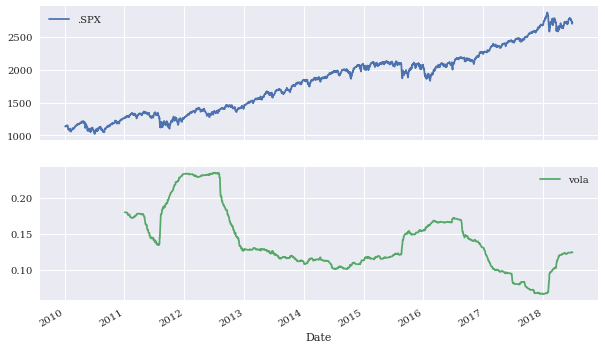

In [65]:
data_1[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));  
# plt.savefig('../../images/ch01/spx_volatility.png')


subplots=True多子图，df的第0列date就是默认的Y轴， figsize画布的大小

## Idioms & Paradigms 高效运算

In [73]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [f(x) for x in a]

1.47 s ± 5.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


反复loop，高计算量来测试运行速度

非numpy向量化计算，用for;in来读取之后循环计算，得出结果。

In [74]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3 * np.log(a) + np.cos(a) ** 2

57.4 ms ± 1.73 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


向量化了，直接可以用a来计算，不需要写出循环结构，直接对数组向量计算，时间也更短，效率更高

尽量少用 for；in 的循环结构，尽量向量化操作

In [75]:
import numexpr as ne
ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

39.4 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


并行计算的工具包numexpr，提高运行速度。

ne.set_num_threads(1)用几个核心，1个核心， f = '3 * log(a) + cos(a) ** 2'，ne.evaluate(f)计算的公式

In [76]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

13.3 ms ± 168 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Data-Driven & AI-First Finance

### Data-Driven Finance 

**This sub-section requires a Eikon license. Therefore no code is provided.**

### AI-First Finance 

In [3]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data['Returns'] = np.log(data / data.shift())  
data.dropna(inplace=True)

In [17]:
data.head(15)

,AAPL.O,Returns
Date,,
2010-01-05,30.625684,0.001727
2010-01-06,30.138541,-0.016034
2010-01-07,30.082827,-0.001850
2010-01-08,30.282827,0.006626
2010-01-11,30.015684,-0.008861
2010-01-12,29.674256,-0.011440
2010-01-13,30.092827,0.014007
2010-01-14,29.918542,-0.005808
2010-01-15,29.418542,-0.016853


## 2010-01-18	NaN	NaN  2010-01-19	30.719969	NaN

如果在原始data，处理returns之前没有用data.dropna(inplace=True)来处理数据，就会造成两天retuens处出现NaN

在计算完returns后再用data.dropna(inplace=True)会对有AAPL.O值的日期一并删除，造成数据的无意义浪费，所以要在计算前处理好数据

实际上，在休市日之后的第一天交易日是可以算returns的，将当天的数据和休市日前的最后一天做returns是有实际意义的

In [40]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                   index_col=0, parse_dates=True)
data = pd.DataFrame(data['AAPL.O'])  
data.dropna(inplace=True)
data['Returns'] = np.log(data / data.shift())  

In [41]:
data.head(15)

,AAPL.O,Returns
Date,,
2010-01-04,30.572827,NaN
2010-01-05,30.625684,0.001727
2010-01-06,30.138541,-0.016034
2010-01-07,30.082827,-0.001850
2010-01-08,30.282827,0.006626
2010-01-11,30.015684,-0.008861
2010-01-12,29.674256,-0.011440
2010-01-13,30.092827,0.014007
2010-01-14,29.918542,-0.005808


data.shift()默认data.shift(1)

read_csv可以直接读出网页里面的data

反过来了，传统金融是先提出假设再找数据去支持，而现代大数据基础下的AI可以做到对数据分析出模型和结论（之前可能没有设想到的结论）

这种方法更加接近于自然科学

In [42]:
lags = 6

In [43]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  
    cols.append(col)



{}'.format(lag)显示lag_1...的列名

 np.sign里面的数如果是正数就会输出1，如果是负数就会输出-1，由于分子分母均不为0，所以无0的情况

式子的意义是看returns这个数在较长时间里面的正负变化，通过shift这个函数来使一个数和它之后1~6天后的数对比

In [44]:
data.head(15)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,0.001727,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,30.138541,-0.016034,1.0,NaN,NaN,NaN,NaN,NaN
2010-01-07,30.082827,-0.001850,-1.0,1.0,NaN,NaN,NaN,NaN
2010-01-08,30.282827,0.006626,-1.0,-1.0,1.0,NaN,NaN,NaN
2010-01-11,30.015684,-0.008861,1.0,-1.0,-1.0,1.0,NaN,NaN
2010-01-12,29.674256,-0.011440,-1.0,1.0,-1.0,-1.0,1.0,NaN
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0


In [45]:
data.dropna(inplace=True)

In [46]:
data.head(15)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
Date,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-21,29.724542,-0.017404,-1.0,1.0,-1.0,-1.0,1.0,-1.0
2010-01-22,28.249972,-0.050881,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-25,29.010685,0.026572,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
2010-01-26,29.419971,0.014009,1.0,-1.0,-1.0,-1.0,1.0,-1.0


In [37]:
from sklearn.svm import SVC

SVM的原理就是研究一个区分开X1和X2的最佳线或者线段(分割线)，分割线要尽可能减少统计误差对模型使用的影响。

所以这条线要满足到最近都X1和X2的距离都是最大的，它也可能是一个圆。

Kernel Function内核函数就是投影所具体使用的函数。

K(x, y)：表示样本 x 和 y，添加多项式特征得到新的样本 x'、y'，K(x, y) 就是返回新的样本经过计算得到的值；

在 SVM 类型的算法 SVC() 中，K(x, y) 返回点乘：x' . y' 得到的值：多项式：（x*y+c)^d; 线性核函数：x*y

高斯核函数：rbf全称是Radial Based Function，基于半径的函数。高斯核的任务：找到更有利分类任务的新的空间。

高斯核本质是在衡量样本和样本之间的“相似度”，在一个刻画“相似度”的空间中，让同类样本更好的聚在一起，进而线性可分。

高斯核的本质依旧是Kernel Function，只不过引入向量和

仅仅基于 x1 和 x2 就算出离原点的距离：定义距离函数 f(x1, x2) 为: sqrt( x1^2 + x2 ^ 2 ) ，让 f(x1，x2) 投影到 x3

## 对于上面的问题，就可以用SVM来预测未来是涨还是跌:1还是-1

## 2010-01-13	  30.092827	  0.014007	  -1.0	  -1.0	  1.0	  -1.0	  -1.0	  1.0

## 实操来说，要预估13日是涨还是跌，因为retuens也需要两天（开市价/上个交易日的休市价和当天的休市价）数据的，所以就需要在12号收盘前，预估收盘价，然后确定12号的报酬率returns，再用这个估算13号的涨跌情况，根据这个在收盘前建立多单(1)或者空单(-1)。

## 所以说这个模型比较粗糙，使用性不强，因为需要在12号收盘前，预估收盘价，误差可能很大

In [47]:
?SVC

In [49]:
model = SVC(gamma='scale')  

kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

gamma : {'scale', 'auto'}, 默认'auto'

'auto': uses 1 / n_features.'scale': 1 / (n_features * X.var())

1 / (n_features * X.var())和rdf更加契合

decision_function_shape : {'ovo', 'ovr'}，默认'ovo'（二元情况/两个var),SVM也可以做多元分类，有1，2，3，3个组也可以分类，但是要选'ovr'

多元就是一个个分类，将1和非1划分，然后是2和非2，最后3和非3。还是做多个二元分类的情况，不断切割空间，获得最后结果

In [50]:
model.fit(data[cols], np.sign(data['Returns']))  

SVC()

In [51]:
?model.fit

Python和R里面建模时，x,y的书写顺序不同，Python是x,y，R是y,x.

In [54]:
data['Prediction'] = model.predict(data[cols])  
data.head(15)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction
Date,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
2010-01-21,29.724542,-0.017404,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
2010-01-22,28.249972,-0.050881,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
2010-01-25,29.010685,0.026572,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0
2010-01-26,29.419971,0.014009,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0


## 2010-01-13 returns：0.014007 Prediction：1

## 预测是1，意味着涨(正利率），和当日达returns的情况一致，预测成功，所以预测是基于12号的收盘日价格/13号开盘日价格，来预估13号当天股价的变化，提前在12号休市之前买多（因为1代表正利润），在13号获得收益：0.014007。

In [79]:
data['Strategy'] = data['Prediction'] * data['Returns']

In [80]:
data.head(15)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy
Date,,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.014007
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.005808
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-0.016853
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.043288
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.015536
2010-01-21,29.724542,-0.017404,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-0.017404
2010-01-22,28.249972,-0.050881,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-0.050881
2010-01-25,29.010685,0.026572,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.026572
2010-01-26,29.419971,0.014009,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-0.014009


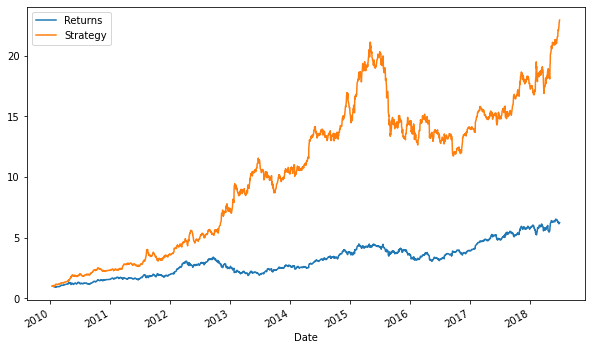

In [81]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch01/AAPL_trading_strategy.png');

从图中可以看到用SVM预测后获得的利润累加大于价格波动获得的利润，有一定作用在投资方面，SVM投资的准确性还是比较可靠的

In [83]:
data_1 = data[['Returns', 'Strategy']].cumsum().apply(np.exp)
data_1

,Returns,Strategy
Date,,
2010-01-13,1.014106,1.014106
2010-01-14,1.008232,1.020013
2010-01-15,0.991383,1.002967
2010-01-19,1.035240,1.047336
2010-01-20,1.019281,1.063734
...,...,...
2018-06-25,6.138991,22.406922
2018-06-26,6.215152,22.684902
2018-06-27,6.206053,22.718161


## 从数据可以看出，从2010-01-13到2018-06-29的近9年半时间里面，利润从1元涨到了6.238067（6倍价格），而如果采取基于SVM的预测后的投资策略获利达到了22.931677，到了当初价值的将近23倍。

In [69]:
data['Returns'].apply(np.sqrt)

Date
2010-01-13    0.118351
2010-01-14         NaN
2010-01-15         NaN
2010-01-19    0.208057
2010-01-20         NaN
                ...   
2018-06-25         NaN
2018-06-26    0.111039
2018-06-27         NaN
2018-06-28    0.085147
2018-06-29         NaN
Name: Returns, Length: 2131, dtype: float64

.apply()对所跟的数据进行括号里面的运算

连续利率具有可加性，算一年利率就是 e^(ln(年初价格/年末价格））.cumsum()累加；exp:e^x

## 总结:缺点1，没有考虑交易成本，缺点2，没有分割数据

分割数据：3部分：train,test,val,_______val是在train set里面的验证数据集

实际上，也不一定要分3段，只要训练出来的模型在实际应用场景下应用一下就知道那些需要改进的了

<AxesSubplot:xlabel='Date'>

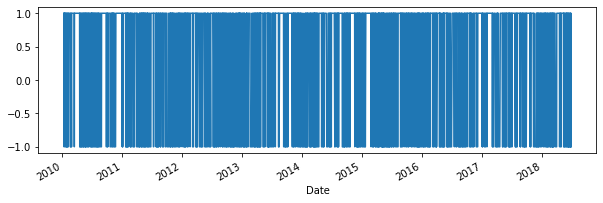

In [84]:
data['Prediction'].plot(figsize = (10,3))

多空不断改变，持有天数很少，下一步看一下进出次数。

In [85]:
data['number'] = np.where(data.Prediction != data.Prediction.shift(), 1, 0)
data.head(15)

,AAPL.O,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,Prediction,Strategy,number
Date,,,,,,,,,,,
2010-01-13,30.092827,0.014007,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.014007,1
2010-01-14,29.918542,-0.005808,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.005808,1
2010-01-15,29.418542,-0.016853,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-0.016853,1
2010-01-19,30.719969,0.043288,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,0.043288,0
2010-01-20,30.246398,-0.015536,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,0.015536,1
2010-01-21,29.724542,-0.017404,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-0.017404,1
2010-01-22,28.249972,-0.050881,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-0.050881,0
2010-01-25,29.010685,0.026572,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.026572,0
2010-01-26,29.419971,0.014009,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-0.014009,1


where相当于if语句，条件：data.Prediction != data.Prediction.shift() -> data.Prediction不等于下一个data.Prediction（！=不等于）

不等于就显示1，等于就显示0

In [89]:
data[['number']].cumsum()

,number
Date,
2010-01-13,1
2010-01-14,2
2010-01-15,3
2010-01-19,3
2010-01-20,4
...,...
2018-06-25,898
2018-06-26,899
2018-06-27,900


9年半里面出现了901次变更多空，有901次进出，偏多，所以在考虑手续费的情况下可能会盈利大量减少。

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>